### Comparing the formatting of G5NR with ECO1280 for 850 pressure level

In [7]:
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs

#### plotting the g5nr grid data in raw and projected form
QV: g5nr humidity data
    8 pressure levels: 200, 250, 300, 400, 500, 600, 700, 850

In [8]:
g5file = xr.open_dataset('/ships19/cryo/daves/windflow/data/c1440_NR.inst30mn_3d_QV_Np.20060808_0000z.nc4')
ghumidity = g5file['QV'][0]
glat = g5file['lat']
glon = g5file['lon']

np.shape(ghumidity)

(8, 2881, 5760)

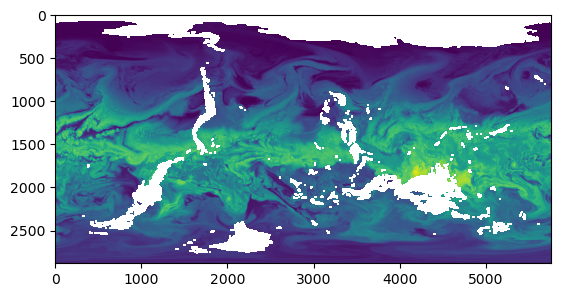

In [9]:
plt.imshow(ghumidity[7])

As we can see in the above image, the data is plotted upside down. Places like Greenland and the Andes Mountains have a ground level that is above the 850 pressure lvl.
Now, let's plot the data in a Plate Carree Projection

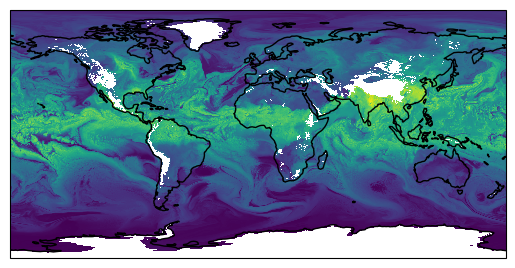

In [18]:
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': projection})
ax.pcolormesh(glon, glat, ghumidity[7], transform=projection)
ax.coastlines()

#### Now, let's plot the Eco1280 data at the same pressure level.
gp_newP: humidity data 8 pressure levels: 200, 250, 300, 400, 500, 600, 700, 850

In [15]:
ecofile = xr.open_dataset('/data/daves/ECO1280/gp_2016-06-01_00:00:00_P500.nc')
ehumidity = ecofile['gp_newP']
elat = ecofile['lat_0']
elon = ecofile['lon_0']

np.shape(ehumidity)


(1801, 3600, 8)

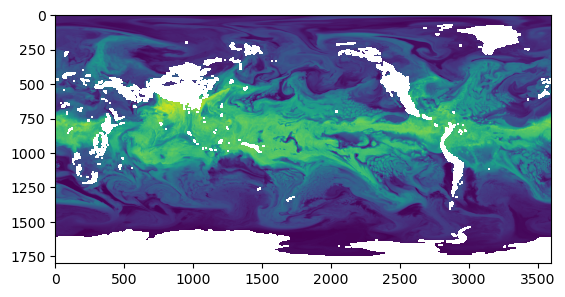

In [16]:
ehumidity_850 = ehumidity[:, :, 7] # get 850 pressure lvl
plt.imshow(ehumidity_850)

As we can see, the Eco1280 is oriented differenly than the G5NR. In this case, the image is oriented facing in the orientation we might expect

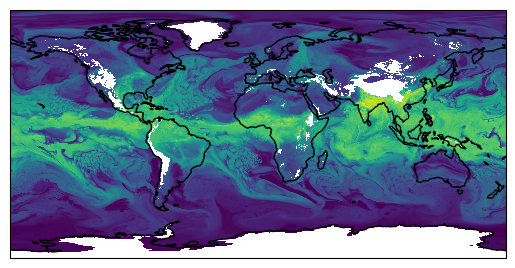

In [17]:
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': projection})
ax.pcolormesh(elon, elat, ehumidity_850, transform=projection)
ax.coastlines()